In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-03-14 14:55:30,801] INFO in core: Started 


2019-09-12


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
CSI 300,69.0,0.068751,0.776128,-2.366262,-0.173198,0.306244,0.572589,1.403792,0.603961,3.196060,15.608808,-1.285042
Alibaba,69.0,-0.003655,0.806448,-2.586698,-0.528963,0.244141,0.561020,1.260611,0.491470,-0.359526,19.689340,-0.893693
M1,69.0,-0.120047,0.638569,-3.100043,-0.236887,0.133146,0.192170,0.578314,0.438406,-11.378919,18.778675,-2.730890
IRA,69.0,-0.028895,1.306545,-5.763281,0.017038,0.294208,0.506792,2.364463,0.284035,-12.739868,31.683081,-2.720700
S&P 500,69.0,-0.198403,0.866693,-3.782369,-0.221449,0.143632,0.261012,0.639140,0.232605,-13.829555,26.668439,-2.275801


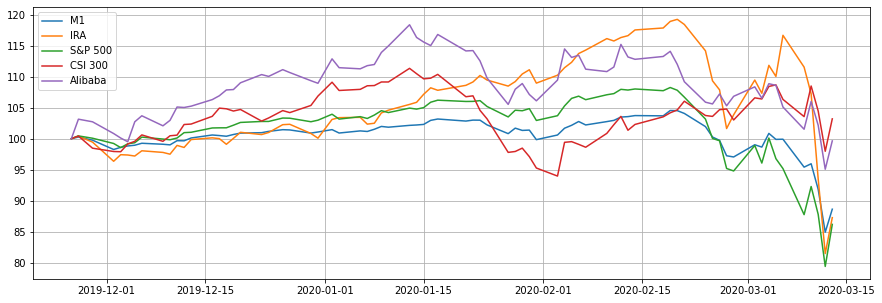

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR', 'BABA'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
    'Alibaba': data['BABA'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.ge

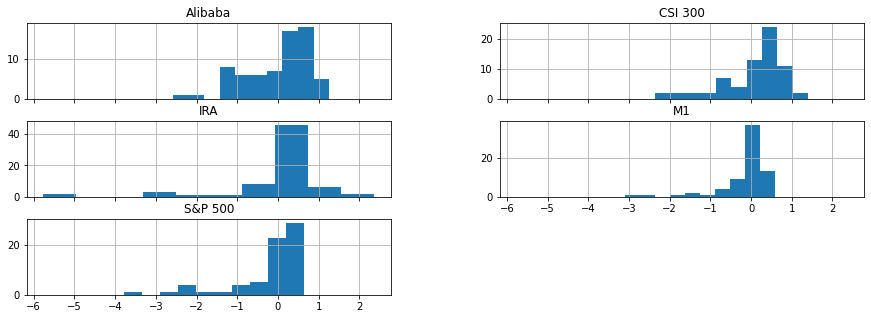

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(3, 2))